In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [6]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [7]:
from tensorflow.keras import optimizers

In [8]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

weight값을 업데이트하는데 사용되는 방법, 여기서는 rmsprop 방법 사용 <br>
비용함수는 categorical_crossentropy 사용

In [9]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경

In [10]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Input scaling

In [11]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [12]:
history = model.fit(train_images, train_labels_one_hot, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3494 - accuracy: 0.8978 - val_loss: 0.1709 - val_accuracy: 0.9521
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1724 - accuracy: 0.9501 - val_loss: 0.1232 - val_accuracy: 0.9648
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1314 - accuracy: 0.9624 - val_loss: 0.1035 - val_accuracy: 0.9707
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1070 - accuracy: 0.9687 - val_loss: 0.0930 - val_accuracy: 0.9743
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0922 - accuracy: 0.9727 - val_loss: 0.0905 - val_accuracy: 0.9743
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0823 - accuracy: 0.9760 - val_loss: 0.0893 - val_accuracy: 0.9754
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0921 - val_accuracy: 0.9743
Epoch 

fit() 함수를 통해서 학습 <br>
epochs => 전체의 학습 데이터를 몇번 사용해서 학습 할 것인지에 대한 것 <br>
epochs = 20 라는 것은 20번 사용한다는 것을 의미 <br>
batch_size 는 경사하강법에서 한번에 몇개의 data points를 사용해서 weight를 업데이트 할 것인지에 대한 것 <br>
batch_size=128 는 한번에 128개의 이미지를 사용해서 weight를 업데이트 한다는 것을 의미

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9827
test_acc: 0.982699990272522


In [13]:
import matplotlib.pyplot as plt

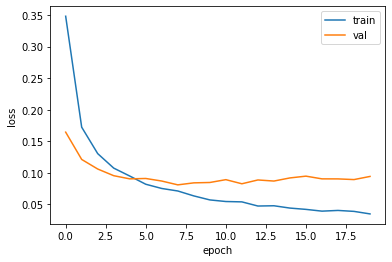

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

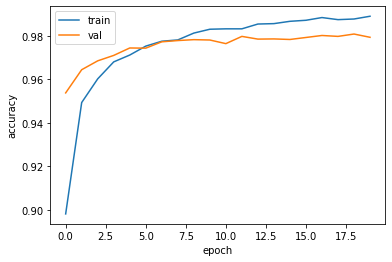

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()